#Diamond price prediction








#Objective

##Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

##Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond color, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of the top of diamond relative to widest point (43--95)

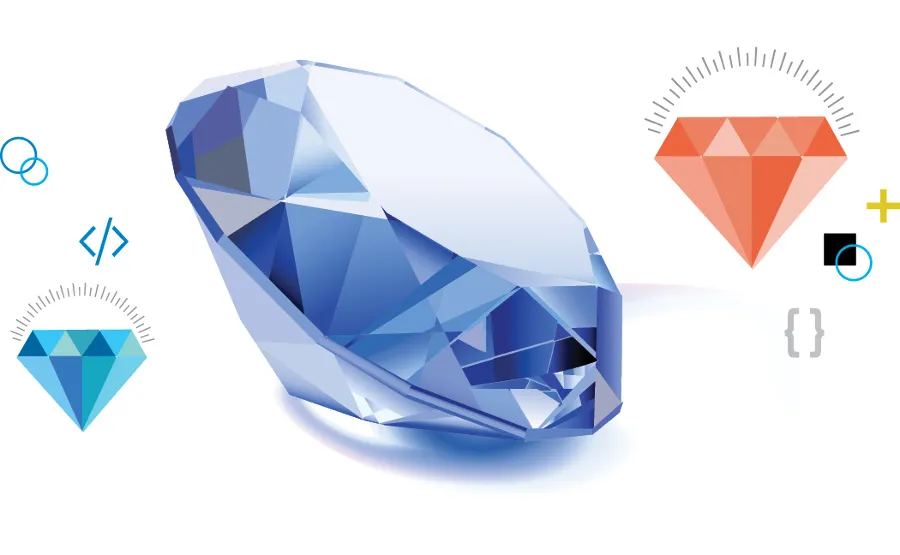

Let’s get started to build the model based on the following steps:   
1-Import Required Packages     
2-Load the dataset    
3-Perform the exploratory data analysis (EDA)   
4-Prepare the dataset for training   
5-Create a linear regression model
6-Train the model to fit the data
7-Make predictions using the trained model

# 1-Importing the libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

#2-Load the dataset

In [3]:
train = pd.read_csv('diamond_train.csv')
test = pd.read_csv('diamond_test.csv')

In [4]:
df = train.copy()

In [5]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [6]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


The dataset contains the prices and other attributes of almost 54,000 diamonds. The columns are as follows:

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

price (dependent variable)

We will use regression methods to model the price according to the different features.

# 3-Perform the exploratory data analysis (EDA)

In [7]:
df.shape

(43152, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [9]:
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df.isnull().any()

Id         False
carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

Our target variable is "price"

In [11]:
#sns.distplot(df['price'])

the target variable is right-skewed => apply a 'log transformation' to make  its distribution more symmetric

Text(0.5, 1.0, 'Distribution of z')

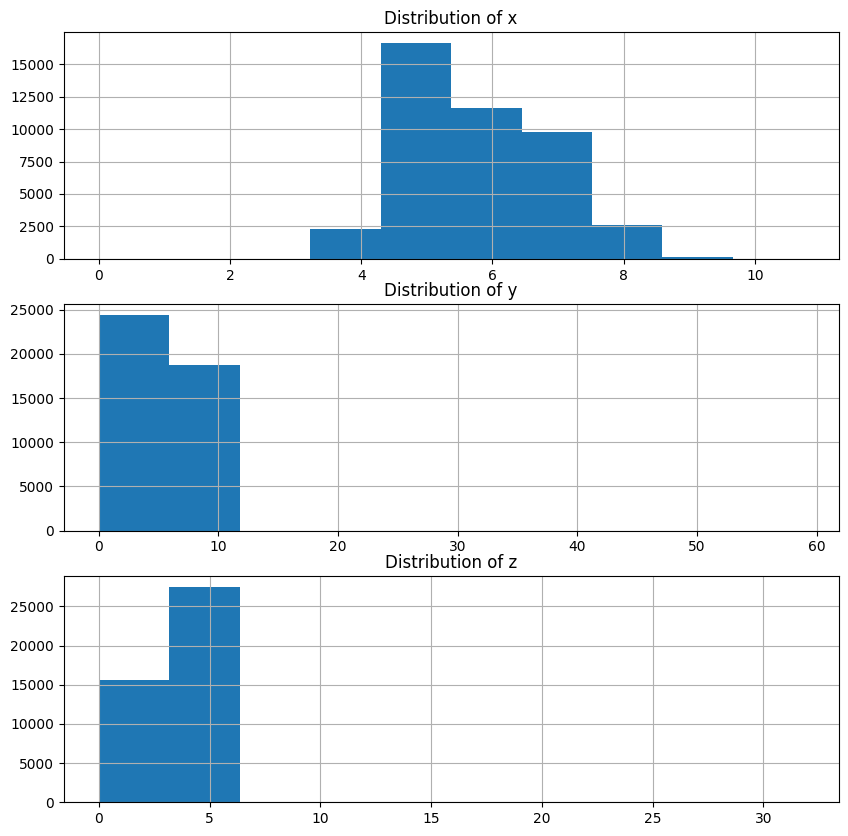

In [12]:
fig, ax = plt.subplots(3, figsize=(10,10))
df['x'].hist(ax=ax[0])
df['y'].hist(ax=ax[1])
df['z'].hist(ax=ax[2])
ax[0].set_title("Distribution of x")
ax[1].set_title("Distribution of y")
ax[2].set_title("Distribution of z")

In [13]:
#delete_dimsionless_values
df = df.drop(df[df['x'] == 0].index)
df = df.drop(df[df['y'] == 0].index)
df = df.drop(df[df['z'] == 0].index)

<ipython-input-14-036e8e53053e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carat'])


<Axes: xlabel='carat', ylabel='Density'>

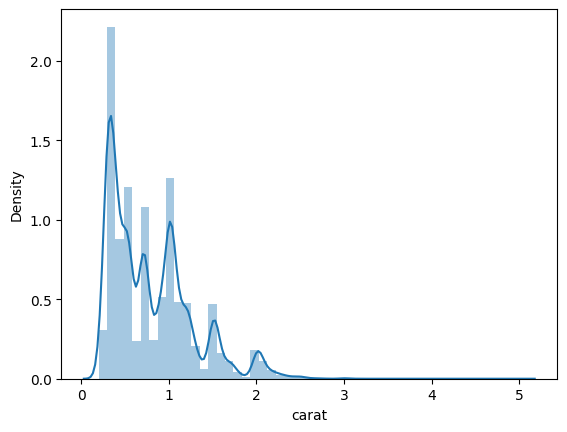

In [14]:
sns.distplot(df['carat'])

In [15]:
df['carat'].skew()

1.1085574097341075

In [16]:
df['carat'] = np.log(df['carat'])
df['carat'].skew()

0.0951613044962432

<ipython-input-17-036e8e53053e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carat'])


<Axes: xlabel='carat', ylabel='Density'>

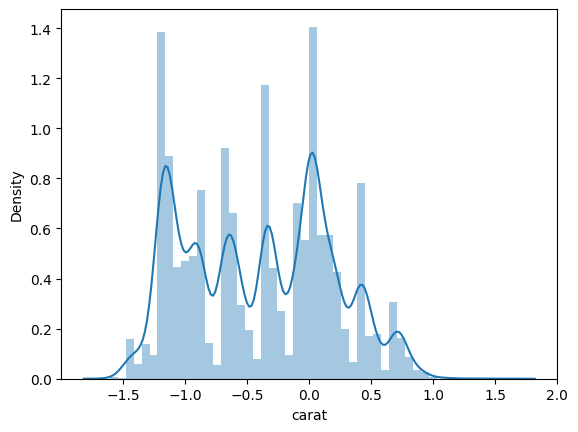

In [17]:
sns.distplot(df['carat'])

In [ ]:
sns.pairplot(df)

In [ ]:
df.describe()

In [ ]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

# 4-Feature Selection(Prepare the dataset for training)

In [ ]:
fig, ax = plt.subplots(3, figsize=(6,10))
sns.countplot(df['cut'],ax=ax[0])
sns.countplot(df['color'],ax=ax[1])
sns.countplot(df['clarity'],ax=ax[2])


In [ ]:
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())

In [ ]:
#Data_Encoding
df['cut'] = df['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
df['color'] = df['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
df['clarity'] = df['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

In [ ]:
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap=plt.cm.Reds)
plt.show()

In [ ]:
# correlation with output variable 
cor_target = abs(corr_matrix["price"])
cor_target

In [ ]:
#depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
#df['depth_total'] = 2 * df['z'] / (df['x'] + df['y'])

# Prepare the data for ML

In [ ]:
test.head()

In [ ]:
test['cut'] = test['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
test['color'] = test['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
test['clarity'] = test['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

#test['depth_total'] = 2 * test['z'] / (test['x'] + test['y'])

In [ ]:
print(test['carat'].skew())
test['carat'] = np.log(test['carat'])
print("Skewness: {}".format(test['carat'].skew()))

In [ ]:
x = df.drop('price',axis=1)
y = df['price']

# Model Buliding(Create a linear regression model)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import metrics 

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x,y)

#6-Train the model to fit the data


In [ ]:
r2_linear = linear_model.score(x, y)
r2_linear

In [ ]:
test.info()

In [ ]:
#test['depth_total'] = test['depth_total'].fillna(0,inplace=True)

#7-Make predictions using the trained model

In [ ]:
y_pred = linear_model.predict(test)
y_pred

In [ ]:
r3_score = linear_model.score(test, y_pred)
r3_score

In [ ]:
y_pred[:5].round(-2)

In [ ]:
y[0:5]

In [ ]:
model_RFR = RandomForestRegressor(n_estimators=100, random_state=42)
model_RFR.fit(x,y)

In [ ]:
RFR_score = model_RFR.score(x, y)
RFR_score

In [ ]:
y_RFR = model_RFR.predict(test)

In [ ]:
df2 = pd.DataFrame(y_RFR)
df1 = pd.read_csv('diamond_test.csv', usecols=['Id'])
submition = pd.concat([df1, df2], axis=1)

In [ ]:
submition.to_csv('final001.csv', index=False)